
----
# Project 1: Investigate a dataset.

### The Selected Dataset: **TMDB** dataset.

-----
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
---

> I've chosen the TMDB dataset from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) to Investigate. 
It was originally sourced from IMDB but got replaced after takedown request.

> I've **Questions** like: <br>
        1- What is the most profitable movie? <br>
        2- Movies average runtime. <br>
    	3- Is there a relationship between release_year and profit? What's the most profitable year? <br>
        4- Frequent Used Genres in Profitable Movies. <br>
        
        
        
---


##### import packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

><ul> <li>Loading data using Pandas DataFrame </li> <li> Data Viewing (number of rows and columns, datatypes, non-null values count and unique values count. </li>
</ul>

### General Properties

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format
Movies = pd.read_csv('tmdb-movies.csv')

In [3]:
Movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"


In [4]:
print('Number of Data Samples:', Movies.shape[0])
print('Number of Features:', Movies.shape[1])

Number of Data Samples: 10866
Number of Features: 21


In [5]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
Movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
for c in Movies.columns:
    print(c,'type is: ', type(Movies[c][0]))

id type is:  <class 'numpy.int64'>
imdb_id type is:  <class 'str'>
popularity type is:  <class 'numpy.float64'>
budget type is:  <class 'numpy.int64'>
revenue type is:  <class 'numpy.int64'>
original_title type is:  <class 'str'>
cast type is:  <class 'str'>
homepage type is:  <class 'str'>
director type is:  <class 'str'>
tagline type is:  <class 'str'>
keywords type is:  <class 'str'>
overview type is:  <class 'str'>
runtime type is:  <class 'numpy.int64'>
genres type is:  <class 'str'>
production_companies type is:  <class 'str'>
release_date type is:  <class 'str'>
vote_count type is:  <class 'numpy.int64'>
vote_average type is:  <class 'numpy.float64'>
release_year type is:  <class 'numpy.int64'>
budget_adj type is:  <class 'numpy.float64'>
revenue_adj type is:  <class 'numpy.float64'>


### Notes: 
     1- Features like id and original_title need to be unique. 
     2- Datatypes have no problems but the release_date, needs to be converted into datetime.
     3- Some features have missing values.

In [8]:
sum(Movies.duplicated(['id']))

1

In [9]:
Movies[Movies.duplicated(['id'])]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"


In [10]:
sum(Movies.duplicated(['original_title']))

295

In [11]:
Movies[Movies.duplicated(['original_title'])].head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.19,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.90,2014,0.00,0.00
1194,296626,tt3534842,0.13,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.80,2014,0.00,0.00


In [12]:
Movies[Movies.original_title == 'Survivor']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
67,334074,tt3247714,2.33,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.40,2015,"18,399,991.90",0.00
1133,281778,tt3297792,0.19,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.90,2014,0.00,0.00


### **Insight**: **From the Last cell above, I found that, Movies can have a similar title, but they are diffirent!**

##### now i'll only drop the duplicated id number sample.

In [13]:
Movies.drop_duplicates(['id'], inplace=True)

**Last Confirmation**

In [14]:
sum(Movies.id.duplicated())

0

**PROVED.**

---


### Data Cleaning:

**release_date feature isn't in its favourable datatype, it needs to be updated.**

In [15]:
Movies['release_date'] = pd.to_datetime(Movies['release_date'])

---
I've decided to drop columns that aren't important for this investigation. <br>
Here are they:

* **id**: As There are no duplicates any more, we won't need to look at movie id.
* **imdb_id**: related to the previous IMDB data. 
* **budget**, **revenue**: budget_adj and revenue_adj are normalised to 2010 levels for more direct comparision.
* **homepage**, **tagline**, **overview** and **keywords**: Unecessary to be used.

---

In [16]:
drop_list = ['id','imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview', 'keywords'] 
Movies.drop(drop_list, axis=1, inplace=True)

In [17]:
print(Movies.columns)

Index(['popularity', 'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')


In [18]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   original_title        10865 non-null  object        
 2   cast                  10789 non-null  object        
 3   director              10821 non-null  object        
 4   runtime               10865 non-null  int64         
 5   genres                10842 non-null  object        
 6   production_companies  9835 non-null   object        
 7   release_date          10865 non-null  datetime64[ns]
 8   vote_count            10865 non-null  int64         
 9   vote_average          10865 non-null  float64       
 10  release_year          10865 non-null  int64         
 11  budget_adj            10865 non-null  float64       
 12  revenue_adj           10865 non-null  float64       
dtypes: datetime64[ns

#### Now it's time to drop null values, Nan and also zeros.

In [19]:
Movies.revenue_adj.describe()

count              10,865.00
mean           51,369,001.76
std           144,638,333.13
min                     0.00
25%                     0.00
50%                     0.00
75%            33,701,729.01
max         2,827,123,750.41
Name: revenue_adj, dtype: float64

In [20]:
#replace all the value from '0' to NAN 
Movies[['budget_adj', 'revenue_adj']] = Movies[['budget_adj', 'revenue_adj']].replace(0, np.NAN)

Movies.dropna(subset = ['budget_adj', 'revenue_adj'], inplace = True)

Movies.shape

(3854, 13)

In [21]:
Movies.release_date.describe()

count                    3854
unique                   2885
top       2014-12-25 00:00:00
freq                        7
first     1970-01-24 00:00:00
last      2069-12-12 00:00:00
Name: release_date, dtype: object

In [22]:
Movies.release_year.describe()

count               3,854.00
mean                2,001.26
std                    11.28
min                 1,960.00
25%                 1,995.00
50%                 2,004.00
75%                 2,010.00
max                 2,015.00
Name: release_year, dtype: float64

## ***Another Insight:*** 
release_date has wrong values, some years are extremley wrong, but i'm not going to drop them, rather than drop the whole   column, and only keep release_year.

In [23]:
Movies.drop(['release_date'], axis=1, inplace=True)

In [24]:
Movies.columns

Index(['popularity', 'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Most Profitable Movie.

In [25]:
Movies.insert(0,'profit_adj', Movies['revenue_adj']-Movies['budget_adj'])

In [26]:
Movies[Movies['profit_adj'] == Movies['profit_adj'].max()] 

,profit_adj,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,"2,750,136,650.92",12.04,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.90,1977,"39,575,591.36","2,789,712,242.28"


### Research Question 2: Movies average runtime.

Detecting the average, and analysing it graphically.

In [27]:
Movies.runtime.mean()

109.22029060716139

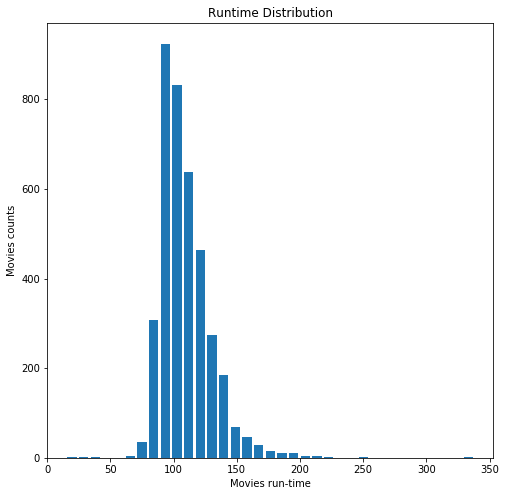

In [28]:
plt.figure(figsize=(8,8))
plt.xlabel('Movies run-time')
plt.ylabel('Movies counts')
plt.title('Runtime Distribution')
plt.hist(Movies['runtime'], bins=35, rwidth=0.8)
plt.show();

In [29]:
Movies['runtime'].describe()

count               3,854.00
mean                  109.22
std                    19.92
min                    15.00
25%                    95.00
50%                   106.00
75%                   119.00
max                   338.00
Name: runtime, dtype: float64

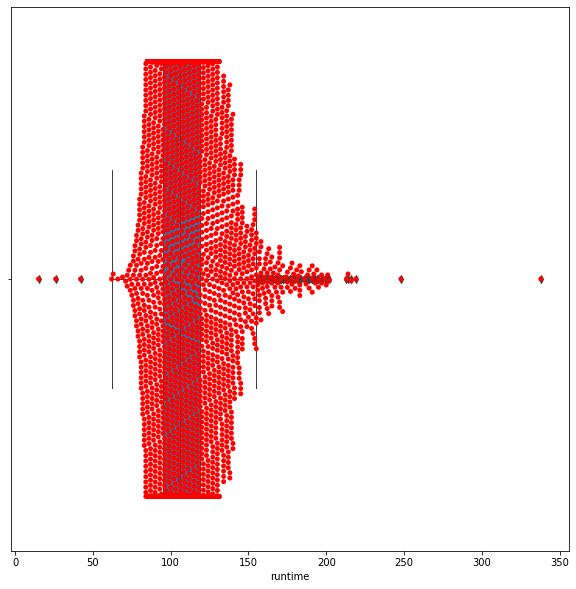

In [30]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.boxplot(Movies['runtime'], linewidth = 1)
sns.swarmplot(Movies['runtime'], color = 'red')
plt.show()

##### Conclusions: 

---

<ul>
    <li> 25% of movies have a runtime of less than 95 minutes. </li>
    <li> 50% of movies have a runtime of less than 109 minutes. </li>
    <li> 75% of movies have a runtime of less than 119 minutes. </li>
</ul>

---

### Research Question 3: Is there a relationship between release_year and profit?

In [31]:
year_VS_profit = Movies.groupby('release_year')['profit_adj'].sum()

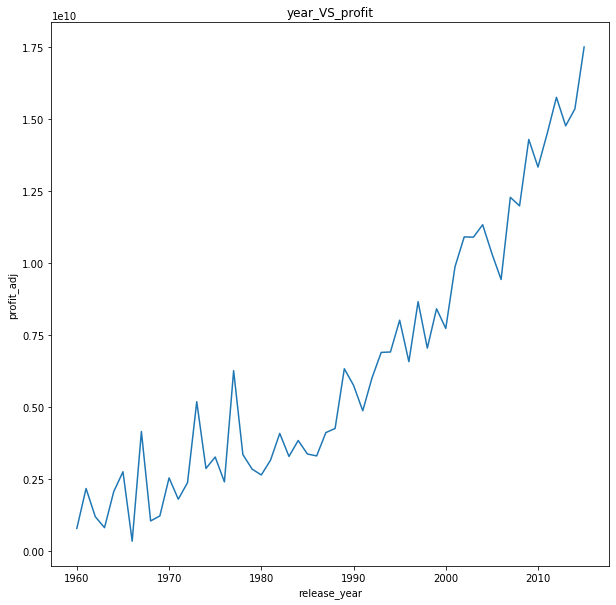

In [32]:
plt.figure(figsize=(10,10))

plt.xlabel('release_year')
plt.ylabel('profit_adj')
plt.title('year_VS_profit')
plt.plot(year_VS_profit)
plt.show()

In [33]:
print(year_VS_profit.idxmax())
Movies[Movies.release_year == year_VS_profit.idxmax()]

2015


,profit_adj,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,"1,254,445,953.24",32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,"210,161,353.21",28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,"170,419,069.94",13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,"1,718,723,210.76",11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,"1,210,948,878.38",9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"737,387.04",0.34,Captive,Kate Mara|David Oyelowo|Michael Kenneth Willia...,Jerry Jameson,97,Crime|Drama|Thriller,Itaca Films|BN Films|Brightside Entertainment|...,55,5.70,2015,"1,839,999.19","2,577,386.23"
380,"-144,716.86",0.30,90 Minutes in Heaven,Kate Bosworth|Hayden Christensen|Hudson Meek|B...,Michael Polish,121,Drama,Emmett/Furla Films|Giving Films,24,5.70,2015,"4,599,997.98","4,455,281.12"
409,"5,968,453.21",0.26,Grandma,Lily Tomlin|Julia Garner|Marcia Gay Harden|Jud...,Paul Weitz,78,Drama|Comedy,Depth of Field|1821 Pictures,81,5.60,2015,"551,999.76","6,520,452.97"
492,"59,606,881.41",0.73,War Room,Priscilla C. Shirer|T.C. Stallings|Karen Aberc...,Alex Kendrick,120,Drama,Provident Films|Affirm Films|Kendrick Brothers...,57,6.90,2015,"2,759,998.79","62,366,880.20"


### Conclusion: 
   From 1960 to 2015, The relationship between release_date and profit isn't linear of-course, but there's a positive correlation. Profits kept increasing a little more, and decrease a little bit till 2015, it reached its peak!

### Research Question 4: Frequent Used Genres in Profitable Movies.

In [34]:
Movies['profit_adj'].describe()

count               3,854.00
mean           92,824,697.22
std           194,071,459.74
min          -413,912,431.00
25%            -1,504,994.63
50%            27,370,641.16
75%           107,454,751.41
max         2,750,136,650.92
Name: profit_adj, dtype: float64

In [35]:
df = Movies[Movies['profit_adj'] >= 75000000]

I've Considerd that high-profit movies, have profits >= 75 millions.

In [36]:
df = df['genres'].str.cat(sep='|')
df = pd.Series(df.split('|'))

In [37]:
df.value_counts()

Drama              453
Action             434
Comedy             431
Adventure          364
Thriller           360
Family             203
Romance            202
Science Fiction    196
Crime              189
Fantasy            179
Animation          116
Horror             106
Mystery            101
Music               50
War                 49
History             36
Western             17
Documentary          3
dtype: int64

In [38]:
genres_count = df.value_counts().sort_values(ascending = True)

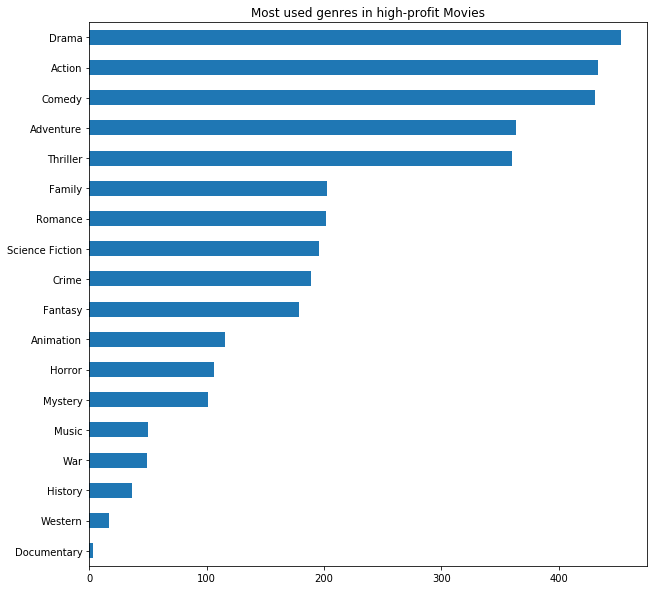

In [39]:
genres_count.plot.barh(figsize=[10,10], title = 'Most used genres in high-profit Movies')
plt.show();

<a id='conclusions'></a>
## Conclusions

> The dataset right now could be accepted for the proccess of solving describtive statistics questions. Zero values samples dropped, also Nan, and corrupt release_date. There's more processing done in-order to solve specific problems like that mentioned above, like counting the most used genres in the most profitable movies, considering that profitable movies have profits >= 75 millions.

> There's a positive correlation between release_date and profit.

> Drama - Action - Comedy - Adventure - Thriller are the most frequent used genres in high-profit movies.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0